In [41]:
import warnings    
!pip install librosa
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [42]:

SAMPLE_RATE = 16000

MAX_SOUND_CLIP_DURATION=12   

In [43]:
set_a=pd.read_csv("C:\\Users\\Admin\\Desktop\\code\\code heart beat\\Heartbeat sounds\\set_a.csv")
set_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [44]:
set_a_timing=pd.read_csv("C:\\Users\\Admin\\Desktop\\code\\code heart beat\\Heartbeat sounds\\set_a_timing.csv")
set_a_timing.head()

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992


In [45]:
set_b=pd.read_csv("C:\\Users\\Admin\\Desktop\\code\\code heart beat\\Heartbeat sounds\\set_b.csv")
set_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [46]:

frames = [set_a, set_b]
train_ab=pd.concat(frames)
train_ab.describe()

,dataset,fname,label,sublabel
count,832,832,585,149
unique,2,832,5,2
top,b,set_b/Btraining_murmur_196_1308141034858_C.wav,normal,noisynormal
freq,656,1,351,120


In [47]:

nb_classes=train_ab.label.unique()

print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))
print (nb_classes)

Number of training examples= 832   Number of classes= 6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


Min samples per category =  19
Max samples per category =  351


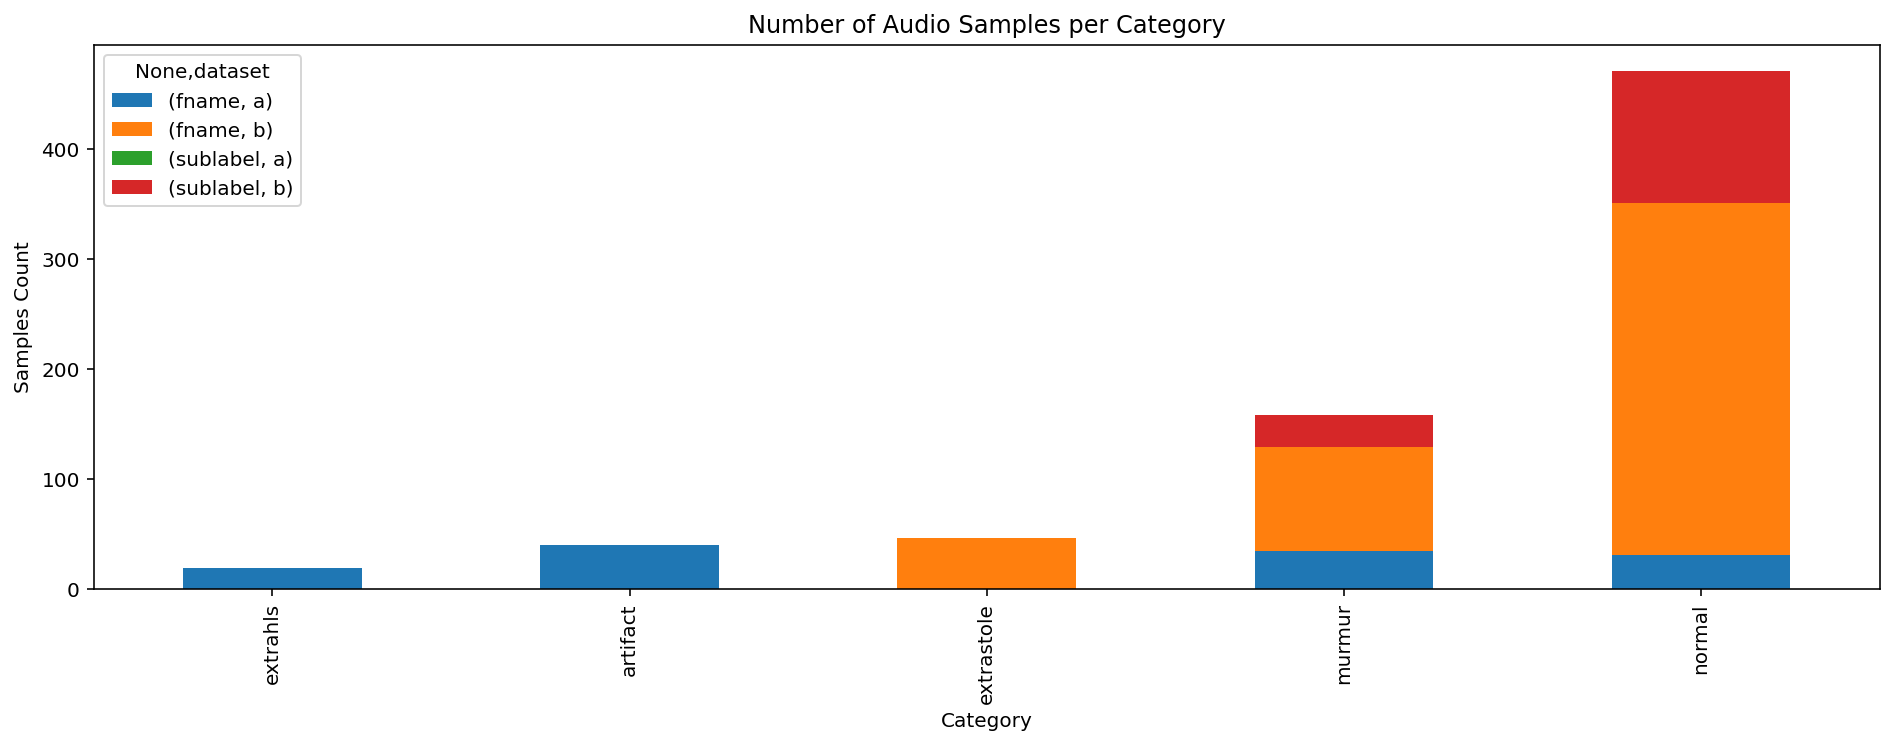

In [48]:

category_group = train_ab.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

print('Min samples per category = ', min(train_ab.label.value_counts()))
print('Max samples per category = ', max(train_ab.label.value_counts()))

In [49]:
print('Minimum samples per category = ', min(train_ab.label.value_counts()))
print('Maximum samples per category = ', max(train_ab.label.value_counts()))

Minimum samples per category =  19
Maximum samples per category =  351


In [50]:
normal_file="C:\\Users\\Admin\\Desktop\\code\\code heart beat\\Heartbeat sounds\\set_a\\normal__201106111136.wav"

In [51]:
import IPython

IPython.display.Audio(normal_file)


In [52]:

import wave
wav = wave.open(normal_file)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  218903
Duration =  4.963786848072562


In [53]:

from scipy.io import wavfile
rate, data = wavfile.read(normal_file)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (218903,)
[-22835 -22726 -22595 ...   -474   -450   -439]


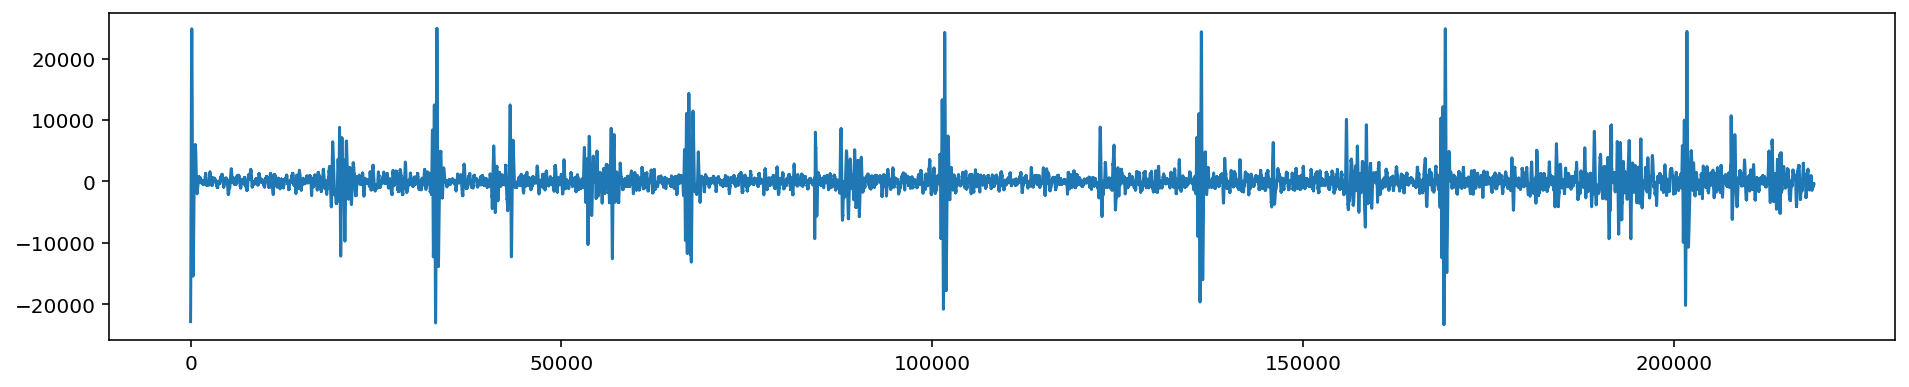

In [54]:
 
plt.figure(figsize=(16, 3))
plt.plot(data, '-', );

In [55]:

y, sr = librosa.load(normal_file, duration=5)   
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y.shape, sr)

duration: 4.963809523809524
(109452,) 22050


In [56]:
murmur_file="C:\\Users\\Admin\\Desktop\\code\\code heart beat\\Heartbeat sounds\\set_a\\murmur__201108222231.wav"
y2, sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y2.shape,sr2)

duration: 4.963809523809524
(110250,) 22050


In [57]:
import IPython.display as ipd
ipd.Audio(murmur_file) 

In [58]:
extrastole_file="C:\\Users\\Admin\\Desktop\\code\\code heart beat\\Heartbeat sounds\\extrastole__127_1306764300147_C2.wav"
y3, sr3 = librosa.load(extrastole_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y3.shape,sr3)

duration: 4.963809523809524
(103106,) 22050


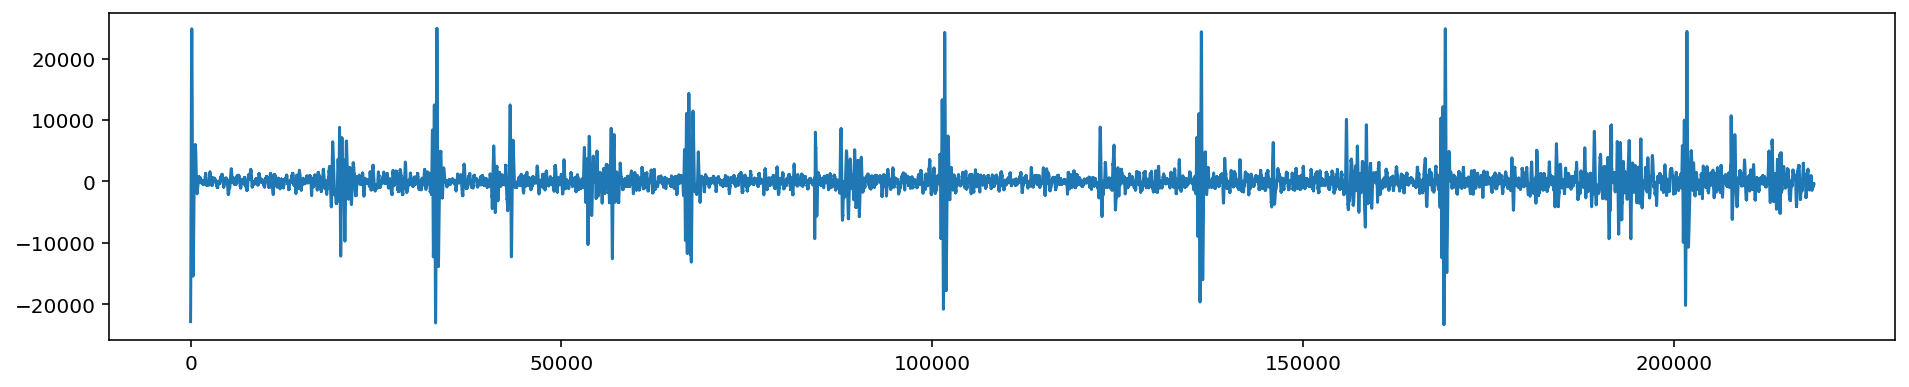

In [59]:
import IPython.display as ipd
ipd.Audio(extrastole_file) 
plt.figure(figsize=(16, 3))
plt.plot(data, '-', );

In [60]:
INPUT_DIR="C:\\Users\\Admin\\Desktop\\code\\code heart beat\\Heartbeat sounds\\"
normal_file=INPUT_DIR+"\\set_a\\normal__201106111136.wav"
#y, sr = librosa.load(sample_file, offset=7, duration=7)
y, sr = librosa.load(normal_file)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print (mfccs)

[[-8.2219505e+01 -1.4839169e+02 -4.0729141e+02 ... -3.6827591e+02
  -3.7412021e+02 -3.7713589e+02]
 [ 1.2423614e+02  1.2667972e+02  1.3922580e+02 ...  1.5181528e+02
   1.6177580e+02  1.6008926e+02]
 [ 1.6999889e+01  1.9273006e+01  1.9956818e+01 ...  2.8723312e+01
   2.5671349e+01  3.3645077e+01]
 ...
 [-2.3264094e-01  3.4405401e-01 -1.3570182e+00 ...  1.1670995e-01
   3.4991848e-01  1.7624743e+00]
 [-3.2621357e+00 -2.6241367e+00  4.8795447e-02 ...  2.1639760e+00
   2.1558404e-03  4.9950151e+00]
 [ 3.2704484e-01  8.1956875e-01 -2.9419880e+00 ...  2.7688129e+00
  -1.4733906e+00  8.5163116e-01]]


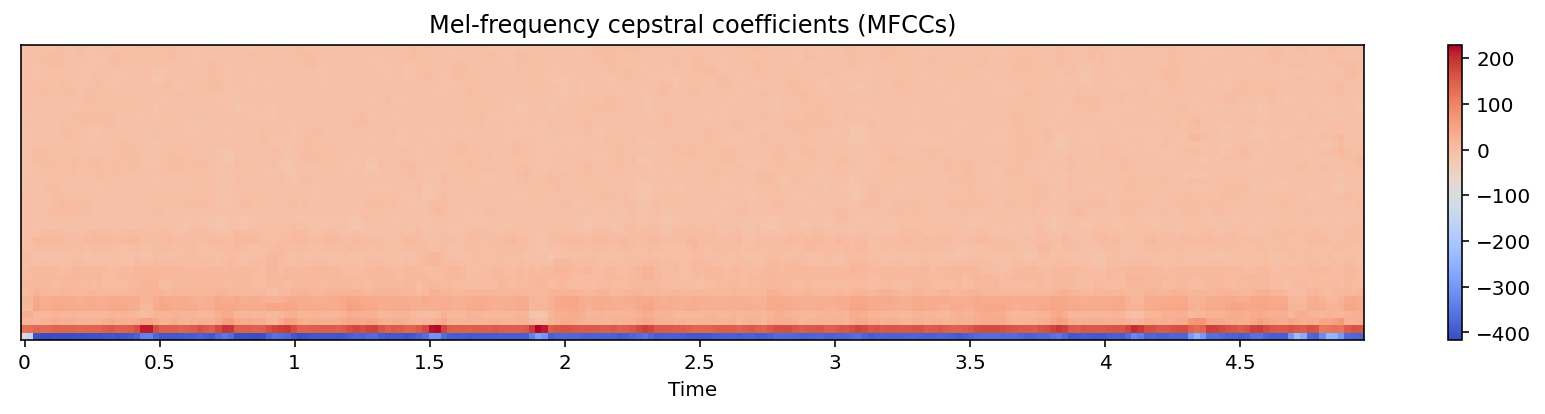

In [61]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

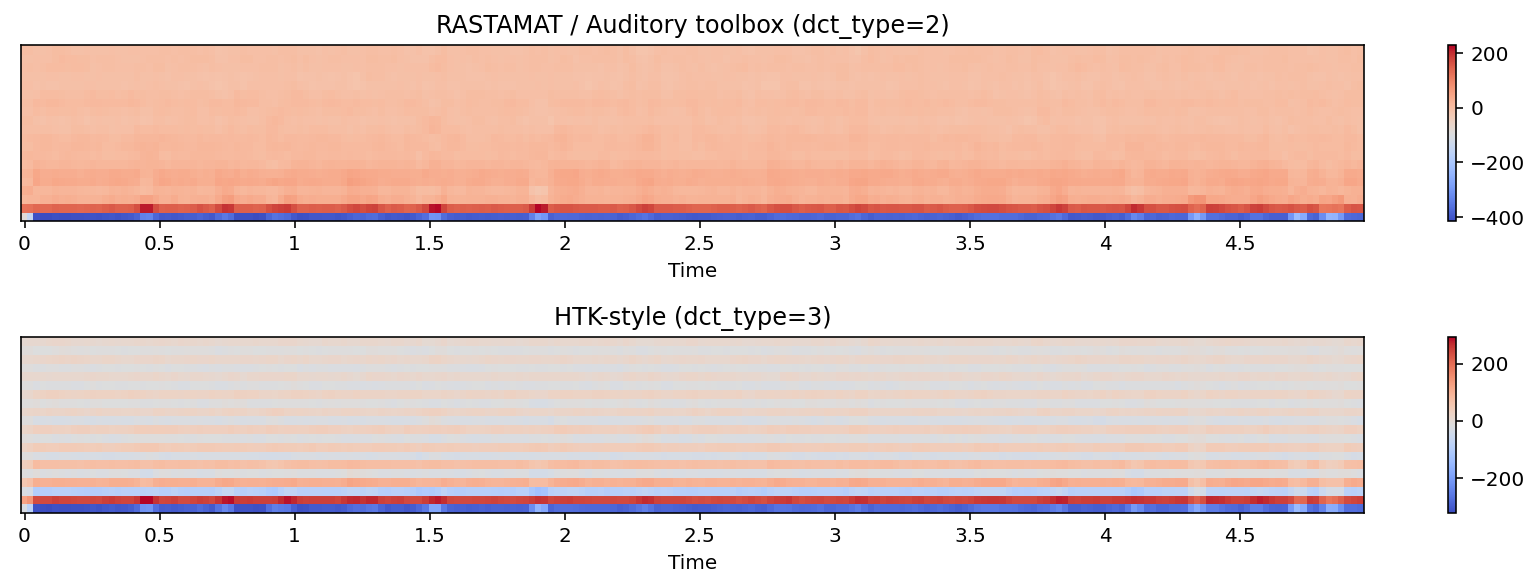

In [62]:
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)

#m_dct1 = librosa.feature.mfcc(y=y, sr=sr, dct_type=1)
plt.figure(figsize=(12, 6))
#plt.subplot(3, 1, 1)
#librosa.display.specshow(m_dct1, x_axis='time')
#plt.title('Discrete cosine transform (dct_type=1)')
#plt.colorbar()
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
plt.subplot(3, 1, 2)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(m_htk, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [63]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

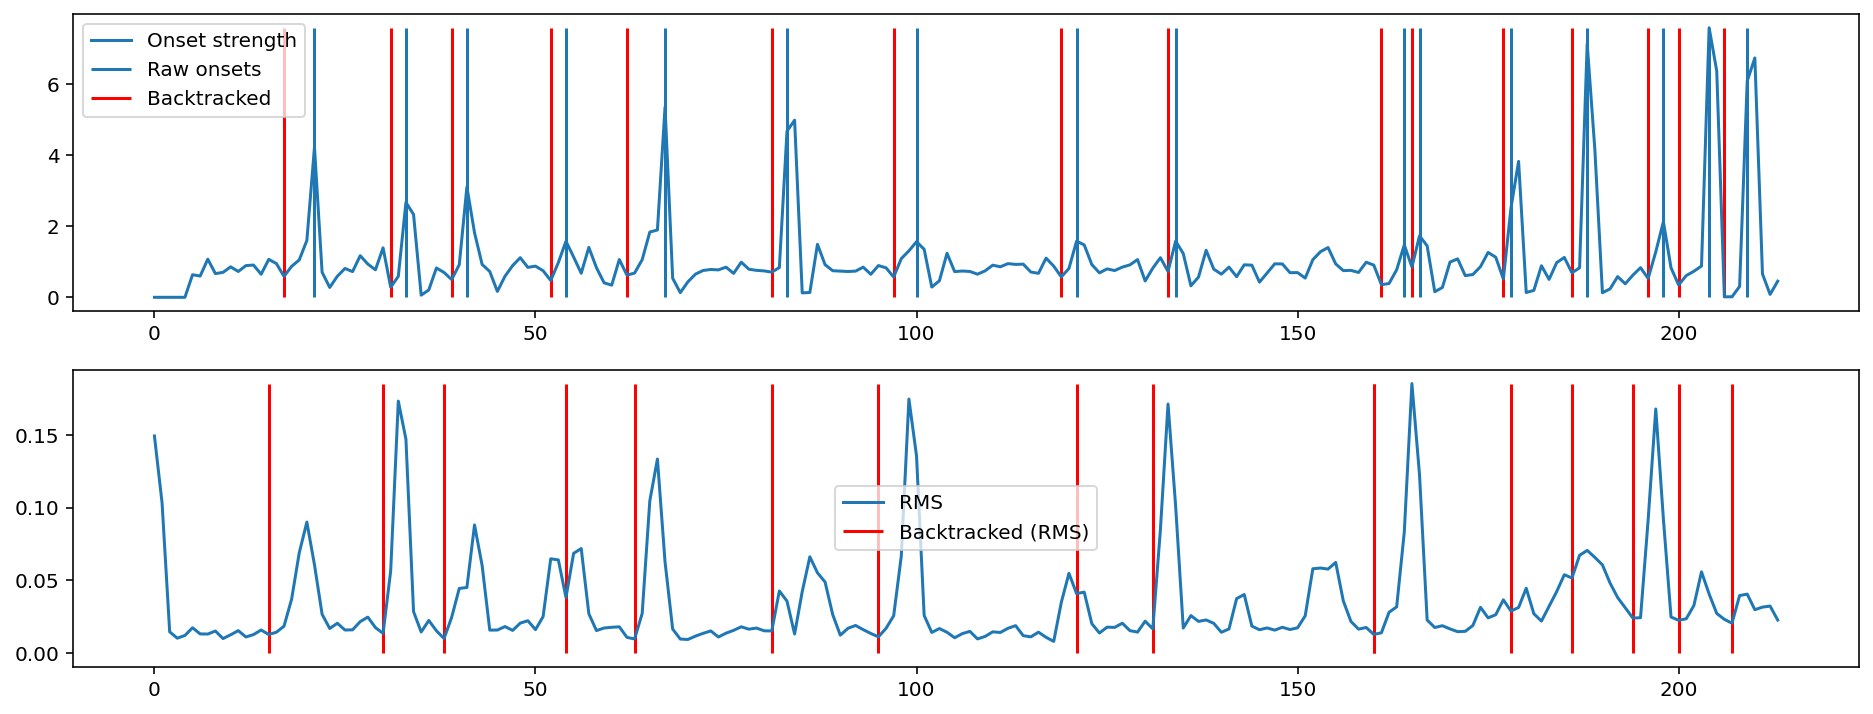

In [64]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)

onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)

onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)

rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

In [65]:
print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))

Number of training examples= 832   Number of classes= 6


In [66]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
           
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data



def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
   
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
           
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
           
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
           
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)


label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")

int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [67]:
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sound

fixing audio lenght : normal__201103170121.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/normal__201103221214.wav
fixing audio lenght : normal__201103221214.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/normal__201104122156.wav
fixing audio lenght : normal__201104122156.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/normal__201104141251.wav
fixing audio lenght : normal__201104141251.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/normal__201105011626.wav
fixing audio lenght : normal__201105011626.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/normal__201105021654.wav
fixing audio lenght : normal__201105021654.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/normal__201105021804.wav
fixing audio lenght : normal__201105021804.wav
load file  C:\Users\Admin\Desktop\code\code hea

fixing audio lenght : murmur__201108222232.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/murmur__201108222233.wav
fixing audio lenght : murmur__201108222233.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/murmur__201108222235.wav
fixing audio lenght : murmur__201108222235.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/murmur__201108222236.wav
fixing audio lenght : murmur__201108222236.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/murmur__201108222237.wav
fixing audio lenght : murmur__201108222237.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/murmur__201108222238.wav
fixing audio lenght : murmur__201108222238.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/murmur__201108222242.wav
fixing audio lenght : murmur__201108222242.wav
load file  C:\Users\Admin\Desktop\code\code hea

fixing audio lenght : Aunlabelledtest__201106170857.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/Aunlabelledtest__201106171155.wav
fixing audio lenght : Aunlabelledtest__201106171155.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/Aunlabelledtest__201106191034.wav
fixing audio lenght : Aunlabelledtest__201106191034.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/Aunlabelledtest__201106211725.wav
fixing audio lenght : Aunlabelledtest__201106211725.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/Aunlabelledtest__201106212102.wav
fixing audio lenght : Aunlabelledtest__201106212102.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/Aunlabelledtest__201108011111.wav
fixing audio lenght : Aunlabelledtest__201108011111.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_a/Aunlabelledtest__201

In [68]:
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio lenght : normal_noisynormal_104_1305032492469_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat 

fixing audio lenght : normal_noisynormal_134_1306428161797_D1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_136_1306429977501_B.wav
fixing audio lenght : normal_noisynormal_136_1306429977501_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_136_1306429977501_C.wav
fixing audio lenght : normal_noisynormal_136_1306429977501_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_136_1306429977501_D1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_137_1306764999211_A1.wav
fixing audio lenght : normal_noisynormal_137_1306764999211_A1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_137_1306764999211_A2.wav
fixing audio lenght : normal_noisynormal_137_1306764999211_A2.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Hear

load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_194_1308139824187_C.wav
fixing audio lenght : normal_noisynormal_194_1308139824187_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_198_1308141739338_D.wav
fixing audio lenght : normal_noisynormal_198_1308141739338_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_207_1308159792607_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_216_1308245839516_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_234_1308748855534_B.wav
fixing audio lenght : normal_noisynormal_234_1308748855534_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal_noisynormal_246_1309199278902_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/

fixing audio lenght : normal__137_1306764999211_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__137_1306764999211_D.wav
fixing audio lenght : normal__137_1306764999211_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__139_1306519274653_A.wav
fixing audio lenght : normal__139_1306519274653_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__140_1306519735121_A.wav
fixing audio lenght : normal__140_1306519735121_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__140_1306519735121_B.wav
fixing audio lenght : normal__140_1306519735121_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__140_1306519735121_D1.wav
fixing audio lenght : normal__140_1306519735121_D1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__141_1306520154450_B.wav
fixing a

fixing audio lenght : normal__170_1307970562729_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__172_1307971284351_B.wav
fixing audio lenght : normal__172_1307971284351_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__172_1307971284351_B1.wav
fixing audio lenght : normal__172_1307971284351_B1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__173_1307973611151_B.wav
fixing audio lenght : normal__173_1307973611151_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__173_1307973611151_C.wav
fixing audio lenght : normal__173_1307973611151_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__174_1307987737137_B.wav
fixing audio lenght : normal__174_1307987737137_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__174_1307987737137_B1.wav
fixing 

load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__210_1308162935880_D2.wav
fixing audio lenght : normal__210_1308162935880_D2.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__213_1308245263936_C.wav
fixing audio lenght : normal__213_1308245263936_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__214_1308245489717_A.wav
fixing audio lenght : normal__214_1308245489717_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__215_1308245664733_C.wav
fixing audio lenght : normal__215_1308245664733_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__215_1308245664733_C1.wav
fixing audio lenght : normal__215_1308245664733_C1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__216_1308245839516_C.wav
fixing audio lenght : normal__216_1308245839516_C.wav
load f

fixing audio lenght : normal__286_1311170606028_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__290_1311182875320_A.wav
fixing audio lenght : normal__290_1311182875320_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__291_1311185210672_A.wav
fixing audio lenght : normal__291_1311185210672_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__294_1311681084248_A.wav
fixing audio lenght : normal__294_1311681084248_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__294_1311681084248_B.wav
fixing audio lenght : normal__294_1311681084248_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__294_1311681084248_D1.wav
fixing audio lenght : normal__294_1311681084248_D1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/normal__295_1311682673157_D.wav
fixing a

load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__160_1307100683334_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__161_1307101199321_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__162_1307101835989_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__162_1307101835989_B.wav
fixing audio lenght : murmur__162_1307101835989_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__164_1307106095995_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__164_1307106095995_C.wav
fixing audio lenght : murmur__164_1307106095995_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__165_1307109069581_C.wav
fixing audio lenght : murmur__165_1307109069581_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartb

fixing audio lenght : murmur__288_1311164615284_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__292_1311185449649_B.wav
fixing audio lenght : murmur__292_1311185449649_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__292_1311185449649_C.wav
fixing audio lenght : murmur__292_1311185449649_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/murmur__293_1311680805936_B1.wav
fixing audio lenght : murmur__293_1311680805936_B1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/extrastole__127_1306764300147_C2.wav
fixing audio lenght : extrastole__127_1306764300147_C2.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/extrastole__128_1306344005749_A.wav
fixing audio lenght : extrastole__128_1306344005749_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/extrastole__130_130634

fixing audio lenght : Bunlabelledtest__101_1305030823364_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__101_1305030823364_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__101_1305030823364_F.wav
fixing audio lenght : Bunlabelledtest__101_1305030823364_F.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__103_1305031931979_A.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__103_1305031931979_C.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__105_1305033453095_B.wav
fixing audio lenght : Bunlabelledtest__105_1305033453095_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlab

fixing audio lenght : Bunlabelledtest__141_1306520154450_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__142_1306763049574_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__143_1306763822290_D.wav
fixing audio lenght : Bunlabelledtest__143_1306763822290_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__144_1306522408528_A.wav
fixing audio lenght : Bunlabelledtest__144_1306522408528_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__145_1307987561278_A.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__145_1307987561278_D.wav
fixing audio lenght : Bunlabelledtest__145_1307987561278_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__146_1306778707532_C.wav
fixing audio lenght : Bunlab

load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__173_1307973611151_D.wav
fixing audio lenght : Bunlabelledtest__173_1307973611151_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__174_1307987737137_C.wav
fixing audio lenght : Bunlabelledtest__174_1307987737137_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__175_1307987962616_C.wav
fixing audio lenght : Bunlabelledtest__175_1307987962616_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__176_1307988171173_A1.wav
fixing audio lenght : Bunlabelledtest__176_1307988171173_A1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__176_1307988171173_C.wav
fixing audio lenght : Bunlabelledtest__176_1307988171173_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunl

fixing audio lenght : Bunlabelledtest__229_1308594979317_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__231_1308748318393_B.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__231_1308748318393_C.wav
fixing audio lenght : Bunlabelledtest__231_1308748318393_C.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__232_1308748524018_A1.wav
fixing audio lenght : Bunlabelledtest__232_1308748524018_A1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__232_1308748524018_D.wav
fixing audio lenght : Bunlabelledtest__232_1308748524018_D.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bunlabelledtest__235_1308749032454_C1.wav
fixing audio lenght : Bunlabelledtest__235_1308749032454_C1.wav
load file  C:\Users\Admin\Desktop\code\code heart beat\Heartbeat sounds\/set_b/Bu

In [69]:
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [70]:
import keras
seed = 1000
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=seed, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(keras.utils.to_categorical(test_y, len(CLASSES)))
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  2340
0

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

training data shape:  (473, 40, 1)
training label shape:  (473, 3)

validation data shape:  (53, 40, 1)
validation label shape:  (53, 3)

test data shape:  (59, 40, 1)
test label shape:  (59, 3)


In [71]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape', 'cosine'])
model.summary()

Build LSTM RNN model ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 29,411
Trainable params: 29,411
Non-trainable params: 0
_________________________________________________________________


In [72]:
best_model_file="./best_model_trained.hdf5"

MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32


callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_val, y_val),
                  callbacks=callback) 

print ("training finised!")

training started..... please wait.

Epoch 00001: loss improved from inf to 0.96910, saving model to ./best_model_trained.hdf5

Epoch 00002: loss improved from 0.96910 to 0.81094, saving model to ./best_model_trained.hdf5

Epoch 00003: loss improved from 0.81094 to 0.75268, saving model to ./best_model_trained.hdf5

Epoch 00004: loss improved from 0.75268 to 0.73191, saving model to ./best_model_trained.hdf5

Epoch 00005: loss improved from 0.73191 to 0.71222, saving model to ./best_model_trained.hdf5

Epoch 00006: loss improved from 0.71222 to 0.69060, saving model to ./best_model_trained.hdf5

Epoch 00007: loss did not improve from 0.69060

Epoch 00008: loss did not improve from 0.69060

Epoch 00009: loss improved from 0.69060 to 0.68286, saving model to ./best_model_trained.hdf5

Epoch 00010: loss did not improve from 0.68286

Epoch 00011: loss improved from 0.68286 to 0.67437, saving model to ./best_model_trained.hdf5

Epoch 00012: loss did not improve from 0.67437

Epoch 00013: los

(80.0, 100.0)

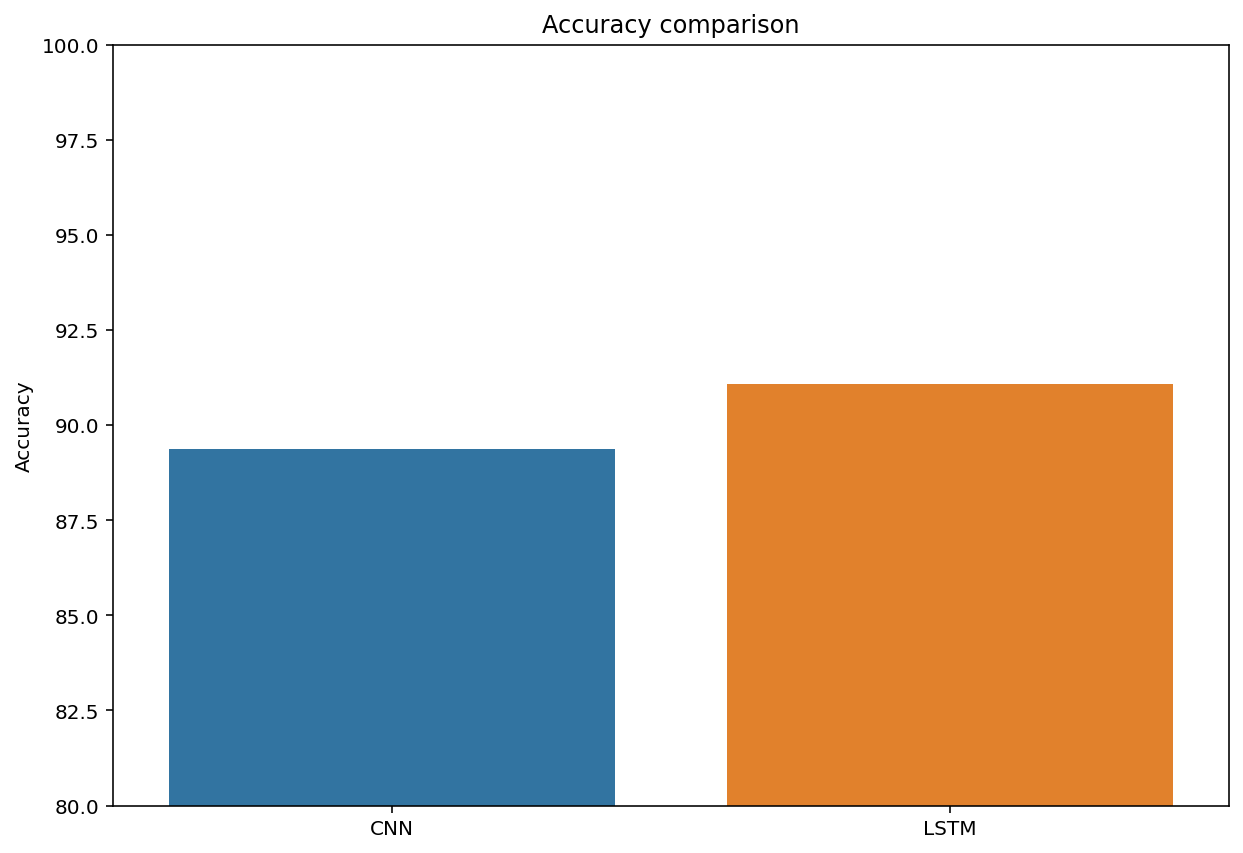

In [73]:
x=['CNN','LSTM']
import matplotlib as plt
#plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,7)


y=[89.37,91.08401]
import numpy as np
import seaborn as sns
ax=sns.barplot(x,y)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
low = min(y)
high = max(y)
ax.set_ylim(80,100)

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [75]:
y_pred = model.predict_classes(x_test, batch_size=32)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[0]])

prediction test return : 2 - normal
